# Noble Model

Source: https://models.physiomeproject.org/exposure/94599657138941a87600b8eaaf3a251f

This model has been curated by both Penny Noble and James Lawson and is known to run in COR, JSim and OpenCell.

This model is valid CellML and has consistent units

Model Structure
In 1962, Denis Noble published one of the first mathematical models of a cardiac cell. By adapting the equations of the original Hodgkin-Huxley squid axon model (1952), Noble described the long lasting action and pace-maker potentials of the Purkinje fibres of the heart. The potassium-current equations differ from those of Hodgkin and Huxley in that the potassium ions are assumed to flow through two types of channel in the membrane. By contrast, the sodium current equations are very similar to those of Hodgkin and Huxley.

The main failure of the Noble (1962) model is that it only includes one voltage gated inward current, INa. Calcium currents had not yet been discovered, but there was a clue in the model that something was missing. The only way the model could be made to work was to greatly extend the voltage range of the sodium current by reducing the voltage dependence of the sodium activation process. In effect the sodium current was made to serve the function of both the sodium and the calcium channels as far as the plateau is concerned. There was a clear experimental prediction: either sodium channels in the heart are quantitatively different from those in neurons, or other inward current-carrying channels must exist. Both predictions are correct.

The complete original paper reference is cited below:

A Modification of the Hodgkin-Huxley Equations Applicable to Purkinje Fibre Action and Pace-maker Potentials, Noble, D. 1962 Journal of Physiology , 160, 317-352. PubMed ID: 14480151

![_](https://models.physiomeproject.org/exposure/94599657138941a87600b8eaaf3a251f/hodgkin_1952.png)
*A schematic cell diagram describing the current flows across the cell membrane that are captured in the Noble 1962 model. Note that this image is identical to the schematic diagram which describes the Hodgkin-Huxley 1952 model. This is because the Noble 1962 model is based on the HH 18952 model, and the ony differences are in the parameters of the model, and also the gating of the potassium channel - and these differences do not show in the schematic diagram.*

## Running the model

We will now demonstrate how to run the model. First we make some neccessary imports 

In [1]:
import utils
import matplotlib.pyplot as plt
import tqdm

Next we need to load the Noble model. Let us first see which models that are available

In [2]:
utils.list_ode_models()

['ORdmm_Land_em_coupling.ode',
 'tentusscher_panfilov_2006_M_cell.ode',
 'noble_1962_version04.ode',
 'ORdmm_Land.ode',
 'fitzhughnagumo.ode']

These files are written in a `.ode` format, which is a special markup language used for declaring ODEs. Let us take a look at the file called `noble_1962_version04.ode` which contains the Noble model

In [3]:
model_name = "noble_1962_version04"
print(utils.get_full_ode_path(model_name).read_text())

# Noble Purkinje Fibre Model 1962
# 
# In 1962, Denis Noble published one of the first mathematical models of a
# cardiac cell. By adapting the equations of the original Hodgkin-Huxley squid
# axon model (1952), Noble described the long lasting action and pace-maker
# potentials of the Purkinje fibres of the heart. The potassium-current
# equations differ from those of Hodgkin and Huxley in that the potassium ions
# are assumed to flow through two types of channel in the membrane. By contrast,
# the sodium current equations are very similar to those of Hodgkin and Huxley.
# 
# The main failure of the Noble (1962) model is that it only includes one voltage
# gated inward current, INa. Calcium currents had not yet been discovered, but
# there was a clue in the model that something was missing. The only way the
# model could be made to work was to greatly extend the voltage range of the
# sodium current by reducing the voltage dependence of the sodium activation
# process. In effect the s

This file is converted a `.cellml` file downloaded from https://models.physiomeproject.org/exposure/94599657138941a87600b8eaaf3a251f to an `.ode` file using a tool called [`gotran`](https://github.com/ComputationalPhysiology/gotran). 

We can also use `gotran` to automatically generate C code for this model, and we can then compile this C code into a shared library that we can use in python. We can to this as follows

In [39]:
model = utils.load_model(model_name)

-- The C compiler identification is AppleClang 14.0.0.14000029
-- Detecting C compiler ABI info
-- Detecting C compiler ABI info - done
-- Check for working C compiler: /Library/Developer/CommandLineTools/usr/bin/cc - skipped
-- Detecting C compile features
-- Detecting C compile features - done
-- Configuring done
-- Generating done
-- Build files have been written to: /Users/finsberg/local/src/uio-digital-scholarship-days/single_cell/c/build_noble_1962_version04
[ 50%] Building C object CMakeFiles/noble_1962_version04.dir/demo.c.o
[100%] Linking C shared library lib/libnoble_1962_version04.dylib
[100%] Built target noble_1962_version04
Loaded ODE model 'noble_1962_version04' with:
     Num full states: 4
      Num parameters: 5


Let us print the model

In [5]:
print(model)

Model named noble_1962_version04 with 4 states, 5 parameters and 16 monitored values


We can also list the default parameters and initial states

In [6]:
print(f"{model.default_parameters() = }")
print(f"{model.default_inital_states() = }")

model.default_parameters() = {'E_Na': 40.0, 'g_Na_max': 400000.0, 'E_L': -60.0, 'g_L': 75.0, 'Cm': 12.0}
model.default_inital_states() = {'m': 0.01, 'h': 0.8, 'n': 0.01, 'V': -87.0}


We now want to solve the model. To do this we use the `model.solve` method. Let us first look at the documentation

In [32]:
model.solve?

Let us solve this model for 3 seconds with a time step of 0.1 millisecond

In [34]:
t_start = 0.0
t_end = 3.0 # seconds
dt = 1e-4  # 0.1 ms
solution = model.solve(t_start=t_start, t_end=t_end, dt=dt)

Now we can plot the resulting voltage

<IPython.core.display.Javascript object>


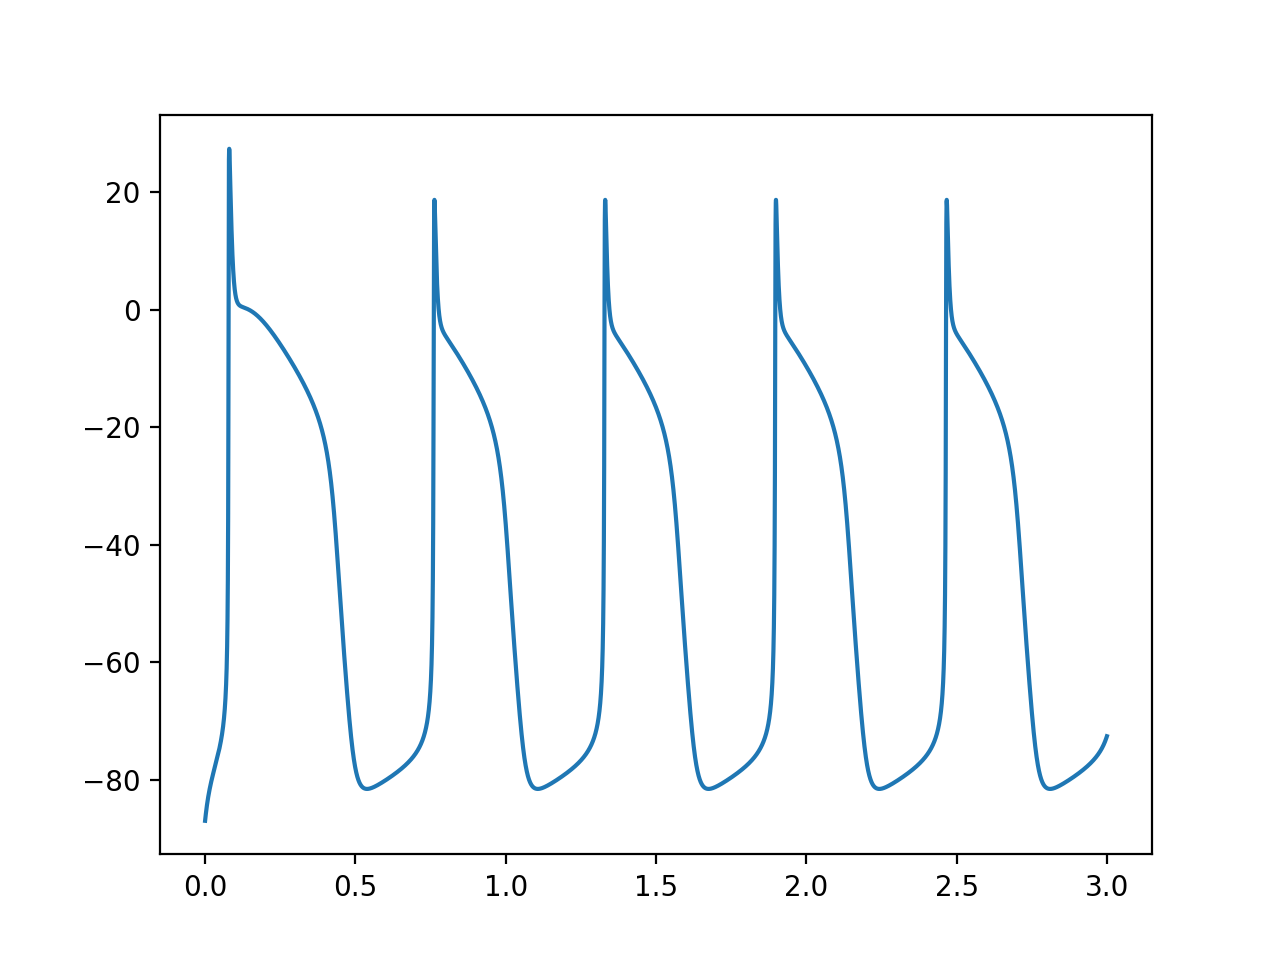

In [35]:
%matplotlib notebook
fig, ax = plt.subplots()
ax.plot(solution.time, solution["V"])
plt.show()

## Exercise - changing parameters

The model has a parameter called `g_L` with a default value of 75.0. Change this parameter to 25.0 and solve the model with the same start and end time and the same time step. Plot the two solutions for V in the same plot for comparison

### Double click for solution

<!--
parameters = model.default_parameters()
parameters["g_L"] = 25.0

new_solution = model.solve(t_start=t_start, t_end=t_end, dt=dt, parameters=parameters)

fig, ax = plt.subplots()
ax.plot(solution.time, solution["V"], label="$g_L=75.0$")
ax.plot(new_solution.time, new_solution["V"], label="$g_L=25.0$")
ax.legend()
plt.show()
-->
